In [1]:
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [3]:
data=pd.read_csv('iris.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sepal length   150 non-null    float64
 1   sepal width    150 non-null    float64
 2    petal length  150 non-null    float64
 3   petal width    150 non-null    float64
 4   class          150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
data=data.replace(to_replace={'class':{'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}})
data.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
data['class'] = data['class'].astype('category').cat.codes

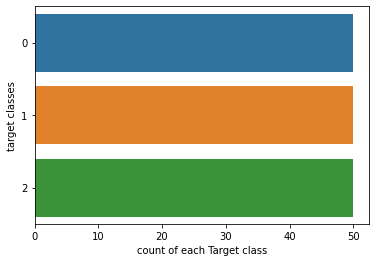

In [9]:
sns.countplot(y=data['class'],data=data)
plt.ylabel('target classes')
plt.xlabel('count of each Target class')
plt.show()

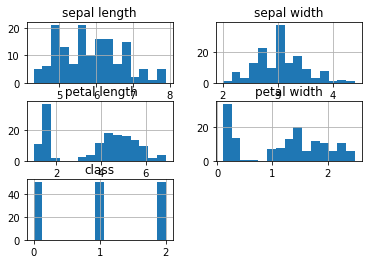

In [10]:
data.hist(bins=15)
plt.title('Featue distibution')
plt.show()

<AxesSubplot:>

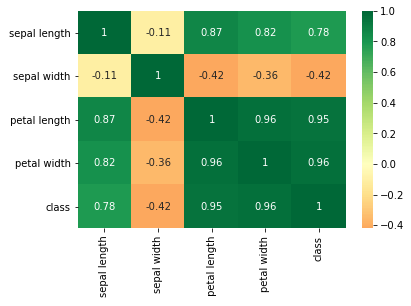

In [11]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',center=0)

In [12]:
data = data.sample(frac = 1)
data. head()

,sepal length,sepal width,petal length,petal width,class
53,5.5,2.3,4.0,1.3,1
114,5.8,2.8,5.1,2.4,2
27,5.2,3.5,1.5,0.2,0
1,4.9,3.0,1.4,0.2,0
0,5.1,3.5,1.4,0.2,0


In [13]:
x = data.drop(['class'], axis =1)
y = data['class']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [15]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [16]:
reg = LogisticRegression(multi_class='multinomial',solver='lbfgs')
reg.fit(x_train, y_train)

LogisticRegression(multi_class='multinomial')

In [17]:
y_pred = reg.predict(x_test)
y_proba = reg.predict_proba(x_test)
y_pred

array([2, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 2, 2, 0, 0, 2, 1, 0, 0, 0, 2,
       0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 1, 1, 1, 2, 1, 2, 0, 0, 2, 0,
       1], dtype=int8)

In [18]:
score_lr= reg.score(x_test,y_test)
print(score_lr)

0.9111111111111111


In [19]:
actual=y_test
predicted=y_pred
results=confusion_matrix(actual,predicted)
print('confusion matrix')
print(results)

confusion matrix
[[19  0  0]
 [ 0 11  4]
 [ 0  0 11]]


In [20]:
clf = SVC(kernel='linear', C=1.0, random_state=0)
clf.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [21]:
print ("Train - Accuracy :", accuracy_score(y_train, clf.predict(x_train)))
print ("Train - Confusion matrix :\n",confusion_matrix(y_train, clf.
predict(x_train)))

Train - Accuracy : 0.9714285714285714
Train - Confusion matrix :
 [[31  0  0]
 [ 0 33  2]
 [ 0  1 38]]


In [22]:
print ("Test - Accuracy :", accuracy_score(y_test, clf.predict
(x_test)))
print ("Test - Confusion matrix :\n",confusion_matrix(y_test, clf.
predict(x_test)))

Test - Accuracy : 0.9111111111111111
Test - Confusion matrix :
 [[19  0  0]
 [ 0 11  4]
 [ 0  0 11]]


In [23]:
num=[[6.4,2.9,4.3,1.3]]
num

[[6.4, 2.9, 4.3, 1.3]]

In [24]:
num=sc.fit_transform(num)

In [25]:
u=clf.predict(num)
u[0]

1

In [26]:
rslt = reg.predict(num)
rslt[0]

1